[Consigna del trabajo practico](https://palermo.blackboard.com/ultra/courses/_79180_1/outline/edit/document/_4342914_1?courseId=_79180_1&view=content&state=view)

# Desarrollo
Para el desarrollo del trabajo práctico, el grupo de alumnos deberá elegir uno de los conjuntos de datos disponibles:

- Canciones de Spotify (clasificación).
- Satisfacción en vuelos de aerolíneas (clasificación).
- Precios de viviendas (regresión).

Una vez definido el conjunto de datos para trabajar se deberán seguir los siguientes hitos:

- 1EDA (análisis exploratorio de datos). Debe presentarse en formato Jupyter Notebooks y debe tener conclusiones de los análisis realizados.
- Jupyter Notebook de entrenamiento de modelos. Se deben entrenar al menos 3 algoritmos diferentes y se debe elegir y justificar cuál debería ser el modelo utilizado en producción.
- Presentación final de resultados. Se espera una conclusión final del trabajo realizado.

Dentro de la cursada se encuentran planificadas dos fechas de entregas, en donde los grupos tendrán que cumplir con ciertos lineamientos.

# Entregas

## Entrega de etapa 1 del TP integrador

Los grupos deberán presentar Jupyter Notebook (.ipynb) que contenga:

    Descripción del problema o situación a resolver en el dataset.
    Análisis exploratorio de datos (EDA por sus siglas en inglés). En el apartado de EDA se detallan los elementos requeridos y deseables. Además de gráficos, se espera que se expliquen los hallazgos encontrados.

## Entrega final del TP Integrador

Los grupos deberán presentar Jupyter Notebook (.ipynb) que contenga:

    Entrenamiento de 3 modelos.
    Conclusiones de la performance de los modelos.

# Requerimientos para las entregas

## Entrega de etapa 1 del TP Integrador

### Requerido:

    Distribuciones de las variables.
    Análisis / imputación de valores nulos.
    Análisis valores extremos (Outliers).
    Relación de features con el target.

### Deseable:

    Correlaciones entre variables.

## Entrega de final del TP integrador

### Requerido:

    Metodología de resolución.
    Separación en datos de entrenamiento y validación.
    Elección de métrica.
    Entrenamiento de al menos 3 modelos distintos.
    Matriz de confusión (clasificación) / residual plot (regresión).

### Deseable:

    Pipelines.
    Tuneo de hiper parámetros. 
    Métodos Oversampling y Undersampling (aplica cuando la proporción de una clase es baja).

# Entrega final del TP integrador y defensa oral sincrónica

Se espera que los grupos hagan una presentación (Power Point o similar) del problema resuelto usando machine learning. El foco debe prestarse basado en los siguientes 3 pilares:

    Problema o iniciativa tratada.
    Enfoque de resolución (metodología y técnicas aplicadas).
    Evaluación de resultados.

In [46]:
# Loading dataset

dataset_60s = pd.read_csv('./dataset/dataset-of-60s.csv')
dataset_70s = pd.read_csv('./dataset/dataset-of-70s.csv')
dataset_80s = pd.read_csv('./dataset/dataset-of-80s.csv')
dataset_90s = pd.read_csv('./dataset/dataset-of-90s.csv')
dataset_00s = pd.read_csv('./dataset/dataset-of-00s.csv')
dataset_10s = pd.read_csv('./dataset/dataset-of-10s.csv')

# Adding a decade column for future analysis
dataset_60s['decade'] = '60'
dataset_70s['decade'] = '70'
dataset_80s['decade'] = '80'
dataset_90s['decade'] = '90'
dataset_00s['decade'] = '00'
dataset_10s['decade'] = '10'

# Merging all decades into a single dataset
dataset = pd.concat([dataset_60s, dataset_70s, dataset_80s, dataset_90s, dataset_00s, dataset_10s], ignore_index=True)

# Shuffle the dataset so the decades are mixed
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Descripción del Problema

## Objetivo del Proyecto
Este proyecto tiene como objetivo desarrollar un modelo de machine learning capaz de **clasificar canciones de Spotify por década** basándose en sus características musicales. El dataset contiene canciones de las décadas de los 60s, 70s, 80s, 90s, 00s y 10s.

## Problema a Resolver
¿Es posible predecir la década de una canción basándose únicamente en sus características musicales como tempo, energía, valencia, etc.? Esta información podría ser útil para:
- Sistemas de recomendación musical
- Análisis de tendencias musicales a través del tiempo
- Clasificación automática de música vintage

## Dataset
El dataset está compuesto por canciones de 6 décadas diferentes, cada una con diversas características musicales proporcionadas por la API de Spotify.

In [47]:
# Additional imports for EDA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

# Exploración Inicial del Dataset

In [ ]:
# Información básica del dataset
print("=== INFORMACIÓN GENERAL DEL DATASET ===")
print(f"Forma del dataset: {dataset.shape}")
print(f"Número de canciones: {len(dataset)}")
print(f"Número de características: {len(dataset.columns)}")
print("\n=== PRIMERAS 5 FILAS ===")
display(dataset.head())

print("\n=== DISTRIBUCIÓN POR DÉCADA ===")
decade_counts = dataset['decade'].value_counts().sort_index()
print(decade_counts)
print(f"\nPorcentajes por década:")
print((decade_counts / len(dataset) * 100).round(2))

=== INFORMACIÓN GENERAL DEL DATASET ===
Forma del dataset: (41106, 20)
Número de canciones: 41106
Número de características: 20

=== PRIMERAS 5 FILAS ===


,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Nachtlager N. Granada - The Lower Castle Yard,Traditional,spotify:track:16BjtTPPOnzv83TQWrnQQf,0.530,0.592,10,-16.461,1,0.0366,0.942000,0.93300,0.3930,0.9160,148.098,83400,4,21.26378,6,0,70
1,How's It Going To Be,Third Eye Blind,spotify:track:3Uvx1TO0Kg5HgGPk58lHXv,0.562,0.593,5,-9.362,1,0.0263,0.003270,0.00139,0.0967,0.5740,80.289,253413,4,22.58257,8,1,90
2,Heavenly Perverse,Dimmu Borgir,spotify:track:1J1Z0XIL18hClKmm5T5ytO,0.138,0.981,4,-3.797,1,0.1160,0.000016,0.81400,0.0703,0.0399,97.579,392813,3,19.71308,15,0,00
3,Era um Garoto Que Como Eu Amava os Beatles e o...,Os Incríveis,spotify:track:0mrP69xWBmlnixuVLFqCSl,0.536,0.713,4,-9.203,1,0.0679,0.251000,0.00000,0.9480,0.7720,128.594,209947,4,66.80246,8,0,70
4,Clavel Sevillano,Javier Solís,spotify:track:15fxd1I7i8BFsZhKwoKANr,0.296,0.462,0,-9.521,1,0.0362,0.782000,0.00000,0.6320,0.4430,141.942,226000,3,36.35407,8,0,60



=== DISTRIBUCIÓN POR DÉCADA ===
decade
00    5872
10    6398
60    8642
70    7766
80    6908
90    5520
Name: count, dtype: int64

Porcentajes por década:
decade
00    14.29
10    15.56
60    21.02
70    18.89
80    16.81
90    13.43
Name: count, dtype: float64


In [57]:
# Análisis de valores nulos
print("=== ANÁLISIS DE VALORES NULOS ===")
null_values = dataset.isnull().sum()
print("Valores nulos por columna:")
for col, null_count in null_values.items():
    if null_count > 0:
        print(f"{col}: {null_count} ({null_count/len(dataset)*100:.2f}%)")
    
if null_values.sum() == 0:
    print("✅ No hay valores nulos en el dataset")

print(f"\n=== ANÁLISIS DE DUPLICADOS ===")
duplicates = dataset.duplicated().sum()
print(f"Número de filas duplicadas: {duplicates}")

if duplicates > 0:
    print(f"Porcentaje de duplicados: {duplicates/len(dataset)*100:.2f}%")
else:
    print("✅ No hay filas duplicadas en el dataset")

# Verificar duplicados por track y artist
track_artist_duplicates = dataset.duplicated(subset=['track', 'artist']).sum()
print(f"Canciones duplicadas (mismo track y artist): {track_artist_duplicates}")

print(f"\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
dataset.describe()

=== ANÁLISIS DE VALORES NULOS ===
Valores nulos por columna:
✅ No hay valores nulos en el dataset

=== ANÁLISIS DE DUPLICADOS ===
Número de filas duplicadas: 0
✅ No hay filas duplicadas en el dataset
Canciones duplicadas (mismo track y artist): 1103

=== ESTADÍSTICAS DESCRIPTIVAS ===


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599792,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


# Análisis Exploratorio de Datos (EDA)

## 1. Análisis Univariado

El análisis univariado examina cada variable de forma individual para entender su distribución, tendencia central y dispersión.

=== ANÁLISIS DE LA VARIABLE TARGET (DÉCADA) ===
Esta es una variable categórica que representa la década de cada canción


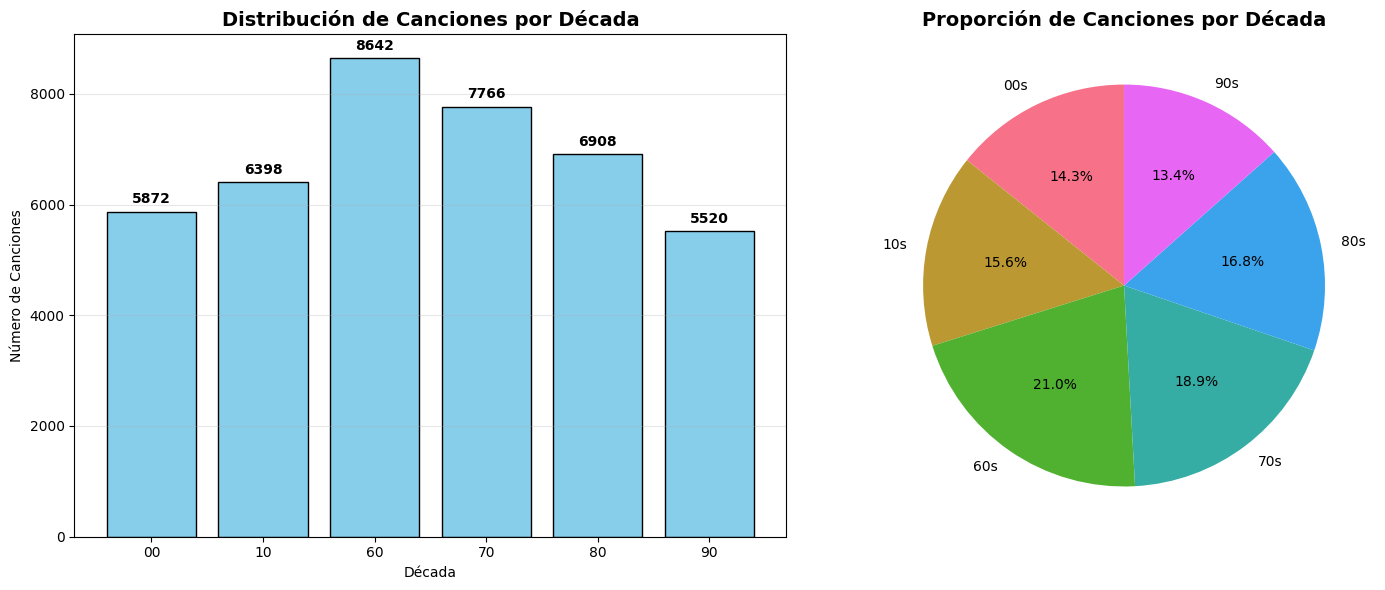


Moda (década más frecuente): 60s
Frecuencia de la moda: 8642 canciones
Porcentaje de la moda: 21.02%


In [60]:
# Análisis de la variable target (década)
print("=== ANÁLISIS DE LA VARIABLE TARGET (DÉCADA) ===")
print("Esta es una variable categórica que representa la década de cada canción")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
decade_counts = dataset['decade'].value_counts().sort_index()
ax1.bar(decade_counts.index, decade_counts.values, color='skyblue', edgecolor='black')
ax1.set_title('Distribución de Canciones por Década', fontsize=14, fontweight='bold')
ax1.set_xlabel('Década')
ax1.set_ylabel('Número de Canciones')
ax1.grid(axis='y', alpha=0.3)

# Agregar valores sobre las barras
for i, v in enumerate(decade_counts.values):
    ax1.text(i, v + 100, str(v), ha='center', va='bottom', fontweight='bold')

# Gráfico de pastel
ax2.pie(decade_counts.values, labels=[f"{decade}s" for decade in decade_counts.index], 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl", len(decade_counts)))
ax2.set_title('Proporción de Canciones por Década', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Medidas de tendencia central para variable categórica
print(f"\nModa (década más frecuente): {dataset['decade'].mode()[0]}s")
print(f"Frecuencia de la moda: {decade_counts.max()} canciones")
print(f"Porcentaje de la moda: {decade_counts.max()/len(dataset)*100:.2f}%")

In [51]:
# Análisis de variables numéricas
print("=== ANÁLISIS DE VARIABLES NUMÉRICAS ===")

# Seleccionar solo variables numéricas excluyendo las categóricas
numeric_cols = dataset.select_dtypes(include=[np.number]).columns.tolist()
# Excluir target ya que es categórico aunque esté codificado como numérico
if 'target' in numeric_cols:
    numeric_cols.remove('target')

print(f"Variables numéricas a analizar: {len(numeric_cols)}")
print(f"Columnas: {numeric_cols}")

# Crear función para calcular medidas de tendencia central y dispersión
def analyze_numeric_variable(data, column):
    """Función para analizar una variable numérica individual"""
    col_data = data[column]
    
    # Medidas de tendencia central
    mean_val = col_data.mean()
    median_val = col_data.median()
    mode_val = col_data.mode()[0] if len(col_data.mode()) > 0 else "N/A"
    
    # Medidas de dispersión
    std_val = col_data.std()
    var_val = col_data.var()
    q1 = col_data.quantile(0.25)
    q3 = col_data.quantile(0.75)
    iqr = q3 - q1
    
    # Detección de outliers usando IQR
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
    
    return {
        'mean': mean_val,
        'median': median_val,
        'mode': mode_val,
        'std': std_val,
        'variance': var_val,
        'q1': q1,
        'q3': q3,
        'iqr': iqr,
        'outliers_count': len(outliers),
        'outliers_percentage': len(outliers) / len(col_data) * 100
    }

# Análisis por variable
analysis_results = {}
for col in numeric_cols:
    analysis_results[col] = analyze_numeric_variable(dataset, col)

# Mostrar resumen
summary_df = pd.DataFrame(analysis_results).T
summary_df = summary_df.round(4)
print("\n=== RESUMEN DE MEDIDAS ESTADÍSTICAS ===")
display(summary_df)

=== ANÁLISIS DE VARIABLES NUMÉRICAS ===
Variables numéricas a analizar: 15
Columnas: ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections']

=== RESUMEN DE MEDIDAS ESTADÍSTICAS ===

=== RESUMEN DE MEDIDAS ESTADÍSTICAS ===


,mean,median,mode,std,variance,q1,q3,iqr,outliers_count,outliers_percentage
danceability,0.5397,0.5520,0.6200,0.1778,3.160000e-02,0.4200,0.6690,0.2490,1.0,0.0024
energy,0.5795,0.6010,0.6410,0.2526,6.380000e-02,0.3960,0.7870,0.3910,0.0,0.0000
key,5.2136,5.0000,0.0000,3.5350,1.249610e+01,2.0000,8.0000,6.0000,0.0,0.0000
loudness,-10.2215,-9.2570,-8.1420,5.3116,2.821340e+01,-12.8160,-6.3742,6.4418,1343.0,3.2672
mode,0.6934,1.0000,1.0000,0.4611,2.126000e-01,0.0000,1.0000,1.0000,0.0,0.0000
speechiness,0.0730,0.0434,0.0331,0.0861,7.400000e-03,0.0337,0.0698,0.0361,5088.0,12.3778
acousticness,0.3642,0.2580,0.9950,0.3389,1.149000e-01,0.0394,0.6760,0.6366,0.0,0.0000
instrumentalness,0.1544,0.0001,0.0000,0.3035,9.210000e-02,0.0000,0.0612,0.0612,8920.0,21.7000
liveness,0.2015,0.1320,0.1110,0.1730,2.990000e-02,0.0940,0.2610,0.1670,2688.0,6.5392
valence,0.5424,0.5580,0.9610,0.2673,7.150000e-02,0.3300,0.7680,0.4380,0.0,0.0000


=== DISTRIBUCIONES DE VARIABLES NUMÉRICAS ===


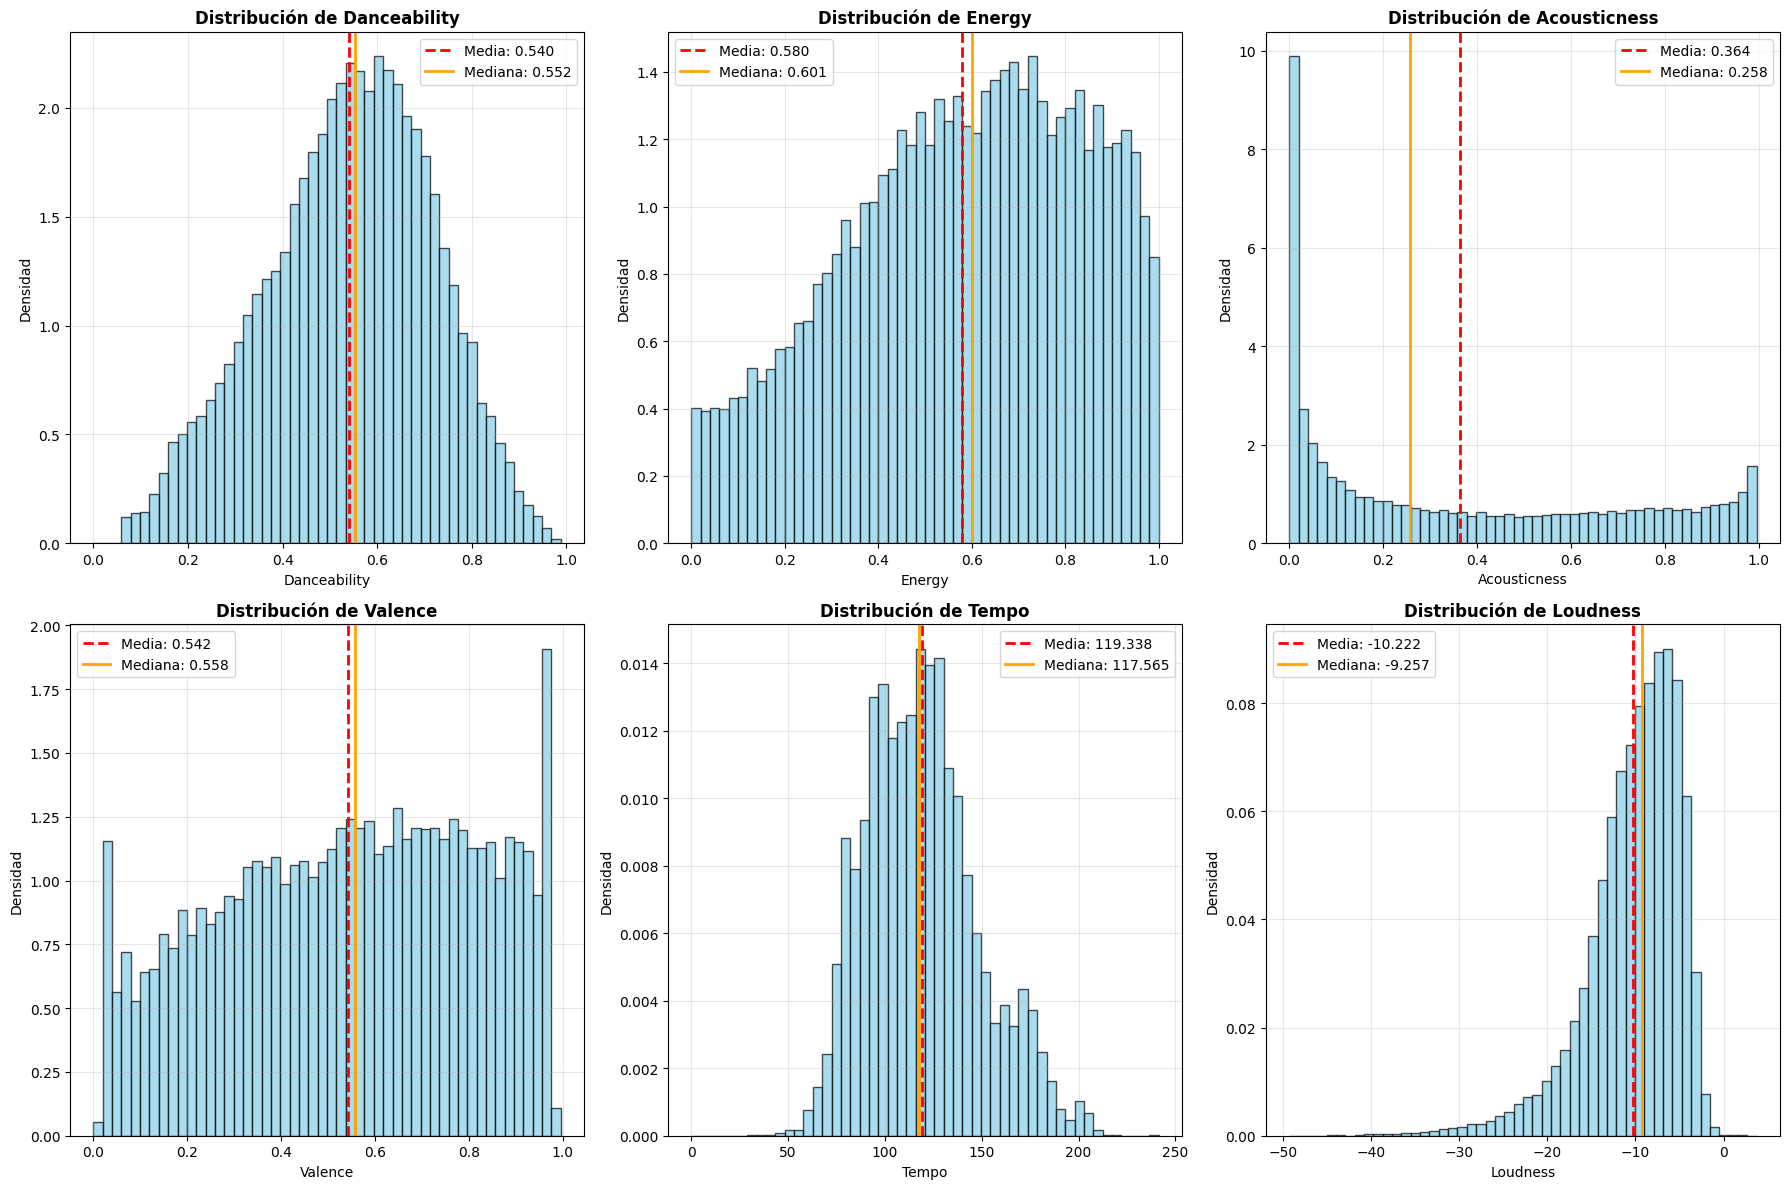


=== ANÁLISIS DE ASIMETRÍA ===
danceability: Skewness = -0.252 -> aproximadamente simétrica
  Media: 0.540, Mediana: 0.552, Diferencia: 0.012

energy: Skewness = -0.320 -> aproximadamente simétrica
  Media: 0.580, Mediana: 0.601, Diferencia: 0.021

acousticness: Skewness = 0.493 -> aproximadamente simétrica
  Media: 0.364, Mediana: 0.258, Diferencia: 0.106

valence: Skewness = -0.180 -> aproximadamente simétrica
  Media: 0.542, Mediana: 0.558, Diferencia: 0.016

tempo: Skewness = 0.485 -> aproximadamente simétrica
  Media: 119.338, Mediana: 117.565, Diferencia: 1.773

loudness: Skewness = -1.415 -> asimétrica negativa (cola izquierda)
  Media: -10.222, Mediana: -9.257, Diferencia: 0.965



In [52]:
# Visualizaciones de distribuciones univariadas
print("=== DISTRIBUCIONES DE VARIABLES NUMÉRICAS ===")

# Variables principales de características musicales de Spotify
main_features = ['danceability', 'energy', 'acousticness', 'valence', 'tempo', 'loudness']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(main_features):
    # Histograma con curva de densidad
    axes[i].hist(dataset[col], bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    
    # Agregar líneas de media y mediana
    mean_val = dataset[col].mean()
    median_val = dataset[col].median()
    
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.3f}')
    axes[i].axvline(median_val, color='orange', linestyle='-', linewidth=2, label=f'Mediana: {median_val:.3f}')
    
    axes[i].set_title(f'Distribución de {col.capitalize()}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Densidad')
    axes[i].legend()
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis de asimetría
print("\n=== ANÁLISIS DE ASIMETRÍA ===")
for col in main_features:
    skewness = stats.skew(dataset[col])
    mean_val = dataset[col].mean()
    median_val = dataset[col].median()
    
    if abs(skewness) < 0.5:
        dist_type = "aproximadamente simétrica"
    elif skewness > 0.5:
        dist_type = "asimétrica positiva (cola derecha)"
    else:
        dist_type = "asimétrica negativa (cola izquierda)"
    
    print(f"{col}: Skewness = {skewness:.3f} -> {dist_type}")
    print(f"  Media: {mean_val:.3f}, Mediana: {median_val:.3f}, Diferencia: {abs(mean_val-median_val):.3f}")
    print()

=== ANÁLISIS DE VALORES EXTREMOS (OUTLIERS) ===


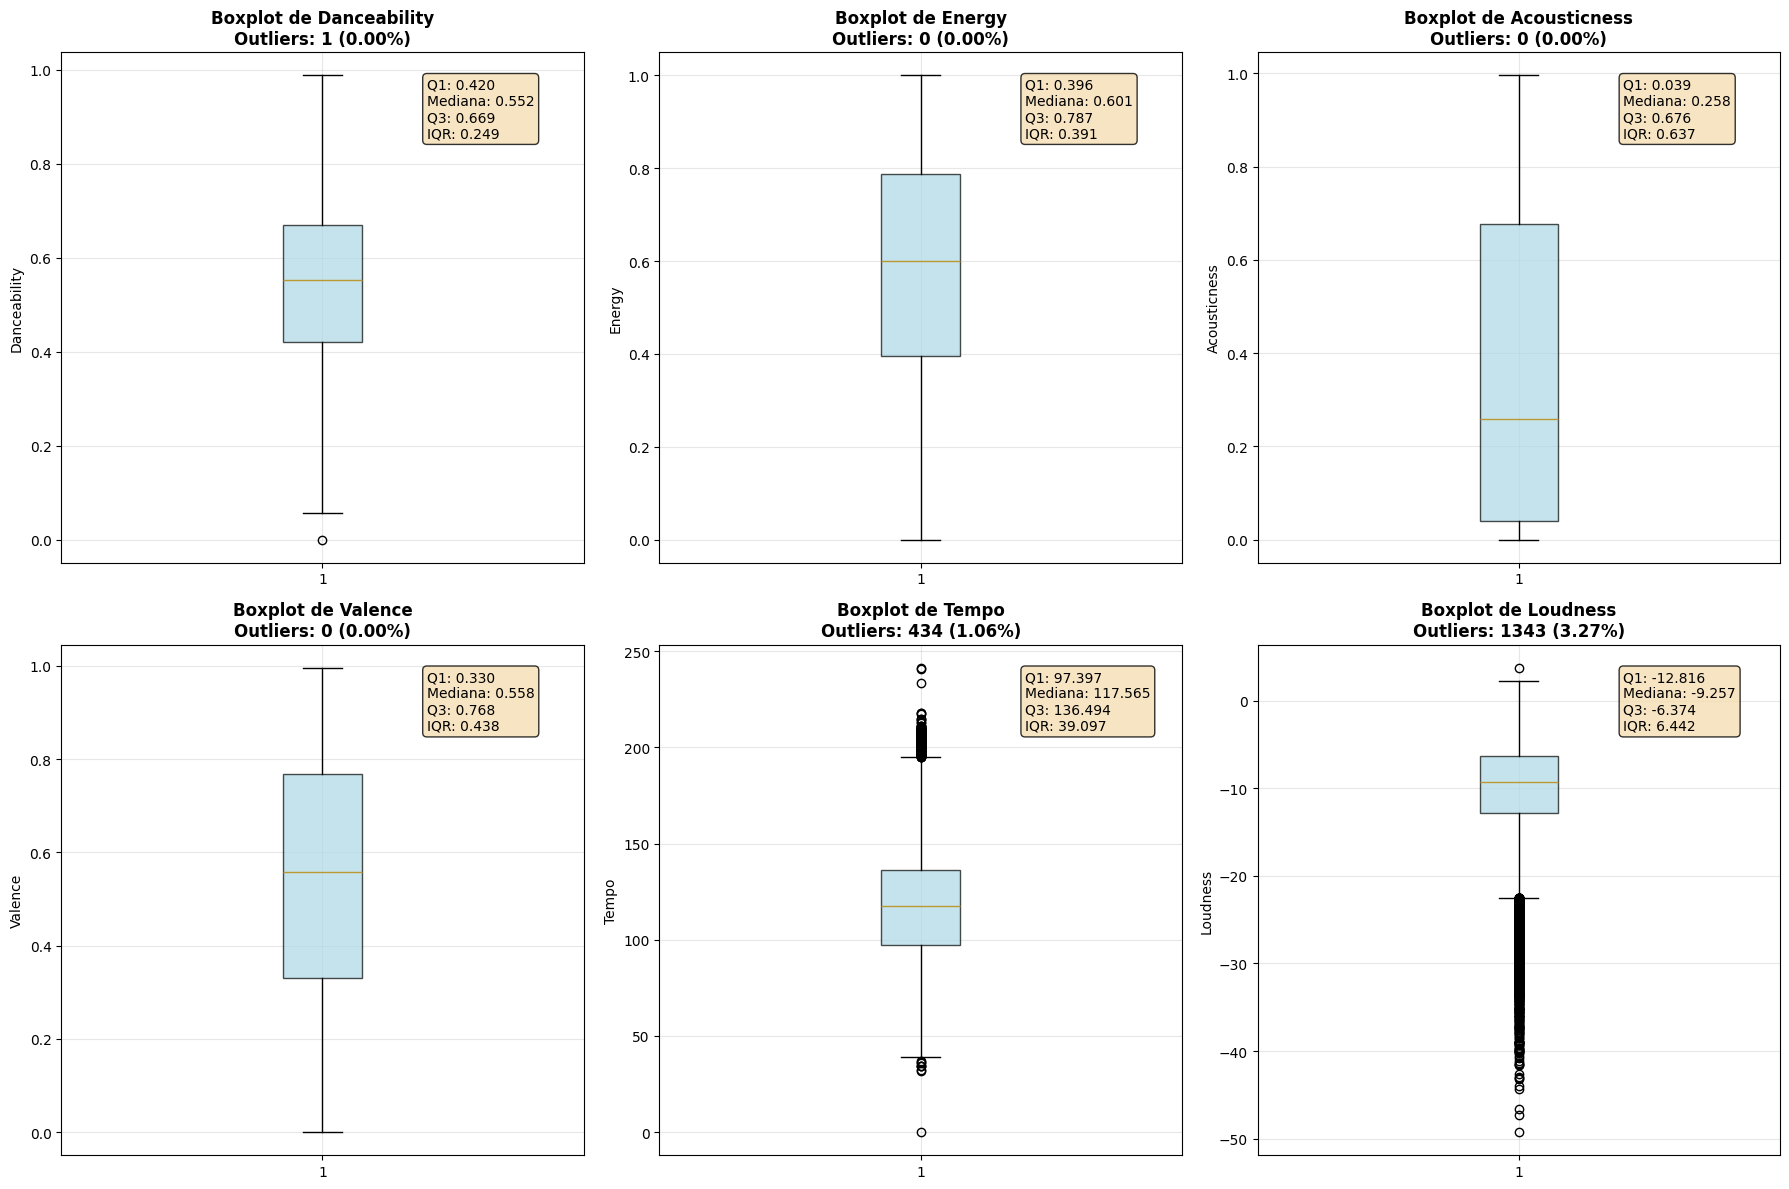


=== RESUMEN DE OUTLIERS ===


,Variable,Total_Outliers,Porcentaje,Limite_Inferior,Limite_Superior
0,danceability,1,0.00%,0.046,1.042
1,energy,0,0.00%,-0.191,1.373
2,acousticness,0,0.00%,-0.916,1.631
3,valence,0,0.00%,-0.327,1.425
4,tempo,434,1.06%,38.752,195.139
5,loudness,1343,3.27%,-22.479,3.288


In [53]:
# Análisis de valores extremos (Outliers) con Boxplots
print("=== ANÁLISIS DE VALORES EXTREMOS (OUTLIERS) ===")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(main_features):
    # Boxplot
    bp = axes[i].boxplot(dataset[col], patch_artist=True, showfliers=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_alpha(0.7)
    
    # Estadísticas del boxplot
    q1 = dataset[col].quantile(0.25)
    median = dataset[col].median()
    q3 = dataset[col].quantile(0.75)
    iqr = q3 - q1
    
    # Calcular outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = dataset[col][(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    
    axes[i].set_title(f'Boxplot de {col.capitalize()}\nOutliers: {len(outliers)} ({len(outliers)/len(dataset)*100:.2f}%)', 
                     fontsize=12, fontweight='bold')
    axes[i].set_ylabel(col.capitalize())
    axes[i].grid(alpha=0.3)
    
    # Agregar texto con estadísticas
    stats_text = f'Q1: {q1:.3f}\nMediana: {median:.3f}\nQ3: {q3:.3f}\nIQR: {iqr:.3f}'
    axes[i].text(0.7, 0.95, stats_text, transform=axes[i].transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Resumen de outliers por variable
print("\n=== RESUMEN DE OUTLIERS ===")
outlier_summary = []
for col in main_features:
    q1 = dataset[col].quantile(0.25)
    q3 = dataset[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = dataset[col][(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    
    outlier_summary.append({
        'Variable': col,
        'Total_Outliers': len(outliers),
        'Porcentaje': f"{len(outliers)/len(dataset)*100:.2f}%",
        'Limite_Inferior': f"{lower_bound:.3f}",
        'Limite_Superior': f"{upper_bound:.3f}"
    })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)

## 2. Análisis Bivariado

El análisis bivariado examina la relación entre dos variables. En nuestro caso, nos enfocaremos en:
1. **Relación de características musicales con la variable target (década)**
2. **Correlaciones entre variables numéricas**

=== RELACIÓN DE CARACTERÍSTICAS CON LA DÉCADA ===


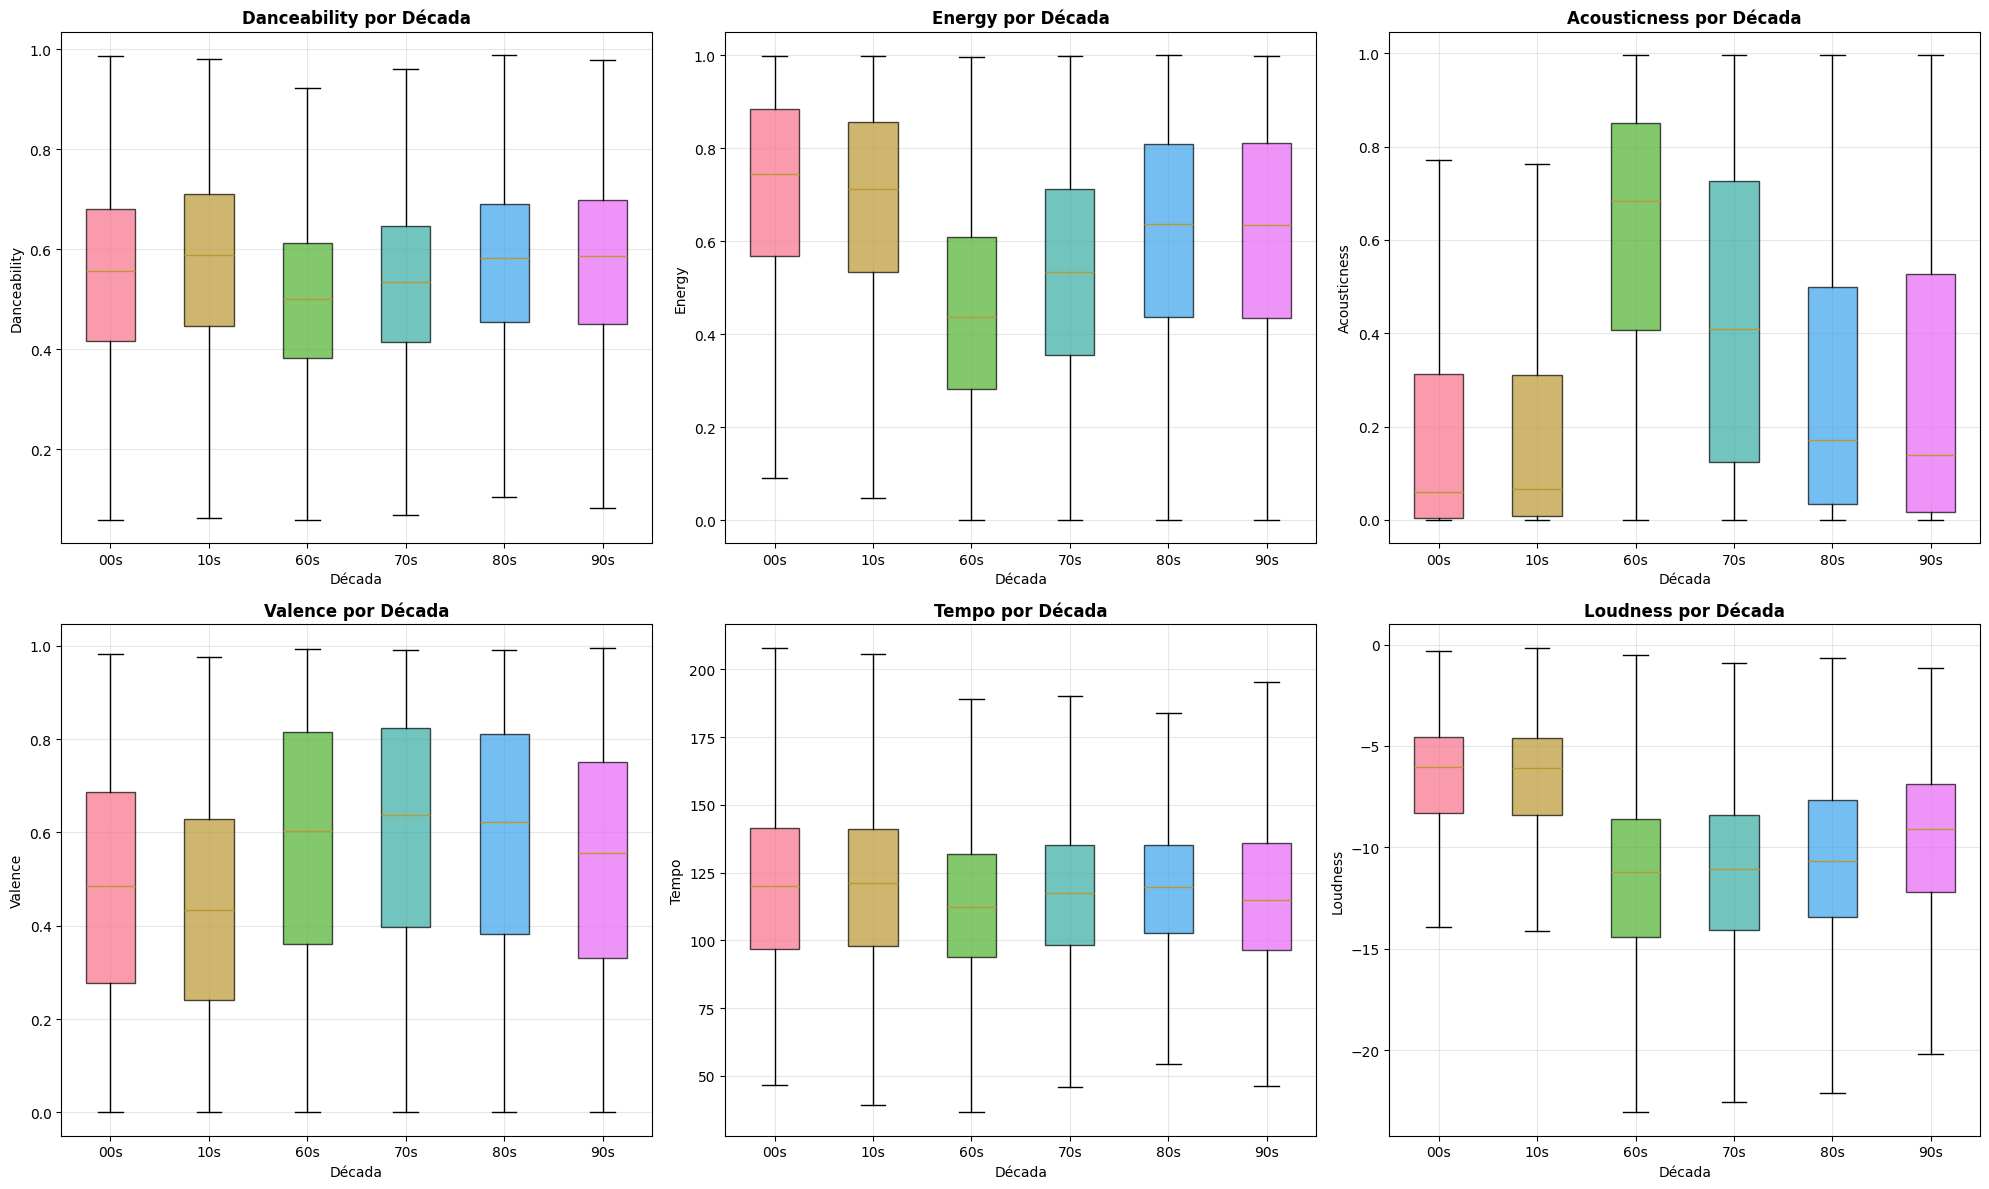


=== ESTADÍSTICAS POR DÉCADA ===

--- DANCEABILITY ---


,mean,median,std
decade,,,
00,0.543,0.556,0.190
10,0.568,0.588,0.191
60,0.492,0.501,0.162
70,0.526,0.534,0.163
80,0.564,0.582,0.173
90,0.567,0.586,0.180



--- ENERGY ---


,mean,median,std
decade,,,
00,0.695,0.744,0.238
10,0.668,0.712,0.241
60,0.445,0.436,0.220
70,0.528,0.533,0.235
80,0.608,0.637,0.243
90,0.602,0.635,0.252



--- ACOUSTICNESS ---


,mean,median,std
decade,,,
00,0.214,0.060,0.297
10,0.217,0.067,0.297
60,0.616,0.683,0.286
70,0.434,0.409,0.322
80,0.293,0.172,0.303
90,0.291,0.140,0.325


In [54]:
# Relación de características musicales con el target (década)
print("=== RELACIÓN DE CARACTERÍSTICAS CON LA DÉCADA ===")

# Boxplots comparando distribuciones por década
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, col in enumerate(main_features):
    # Crear boxplot por década
    decades = sorted(dataset['decade'].unique())
    data_by_decade = [dataset[dataset['decade'] == decade][col] for decade in decades]
    
    bp = axes[i].boxplot(data_by_decade, labels=[f"{d}s" for d in decades], 
                        patch_artist=True, showfliers=False)
    
    # Colorear cada boxplot
    colors = sns.color_palette("husl", len(decades))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[i].set_title(f'{col.capitalize()} por Década', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Década')
    axes[i].set_ylabel(col.capitalize())
    axes[i].grid(alpha=0.3)
    
    # Rotar etiquetas si es necesario
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Análisis estadístico por década
print("\n=== ESTADÍSTICAS POR DÉCADA ===")
for col in main_features[:3]:  # Mostrar solo las primeras 3 para no sobrecargar
    print(f"\n--- {col.upper()} ---")
    decade_stats = dataset.groupby('decade')[col].agg(['mean', 'median', 'std']).round(3)
    display(decade_stats)

## 3. Análisis Multivariado

El análisis multivariado examina las relaciones entre múltiples variables simultáneamente, especialmente las correlaciones entre variables numéricas.

=== ANÁLISIS DE CORRELACIONES ===


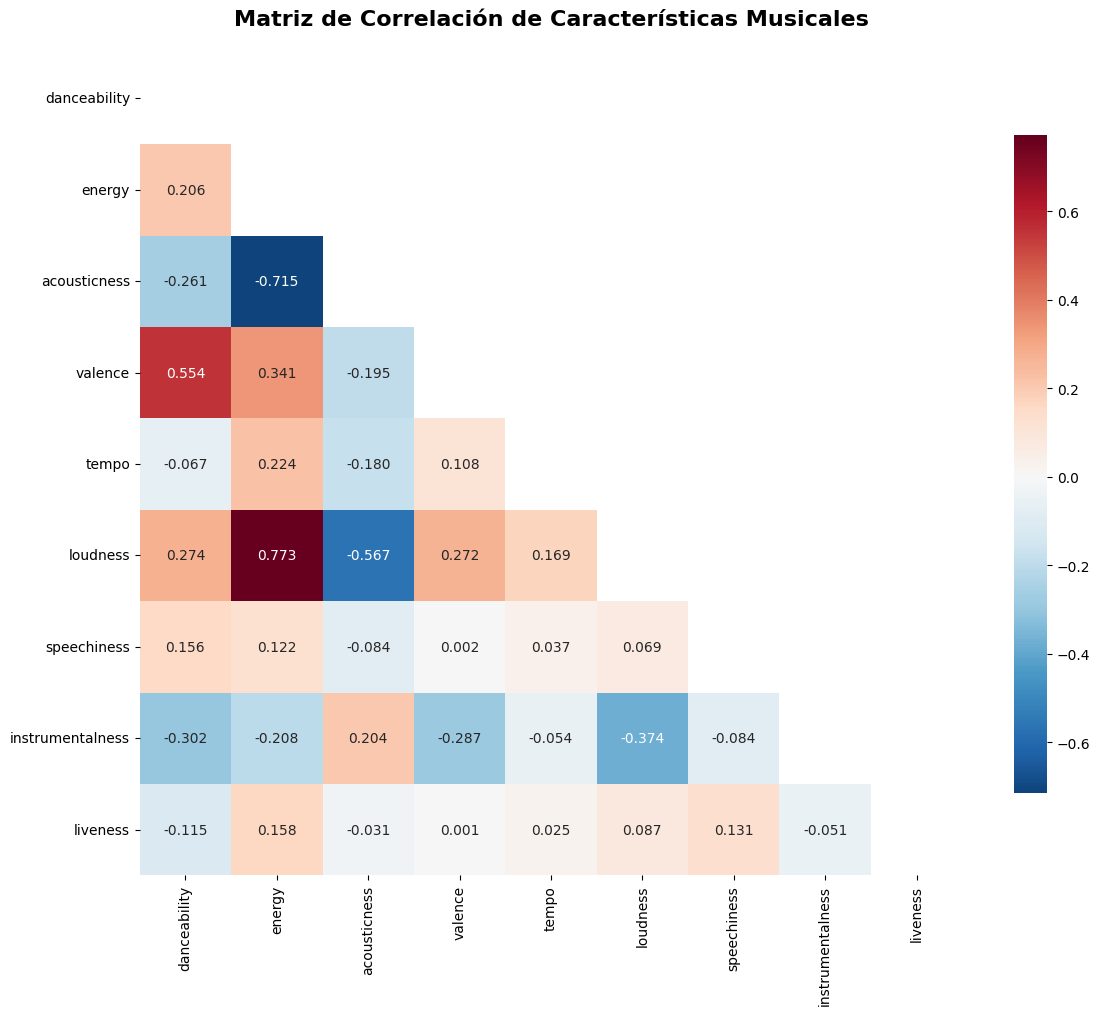


=== CORRELACIONES SIGNIFICATIVAS (|r| > 0.3) ===
energy - loudness: 0.773 (Positiva)
energy - acousticness: -0.715 (Negativa)
acousticness - loudness: -0.567 (Negativa)
danceability - valence: 0.554 (Positiva)
loudness - instrumentalness: -0.374 (Negativa)
energy - valence: 0.341 (Positiva)
danceability - instrumentalness: -0.302 (Negativa)

=== ANÁLISIS DE COVARIANZA ===
La covarianza mide cómo varían dos variables juntas:

Covarianza entre energy y loudness: 1.036764
✓ Relación positiva: cuando energy aumenta, loudness tiende a aumentar


In [55]:
# Análisis de correlaciones entre variables numéricas
print("=== ANÁLISIS DE CORRELACIONES ===")

# Seleccionar variables numéricas relevantes
correlation_cols = main_features + ['speechiness', 'instrumentalness', 'liveness']

# Calcular matriz de correlación
correlation_matrix = dataset[correlation_cols].corr()

# Crear heatmap de correlaciones
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara para mostrar solo la mitad inferior

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8})

plt.title('Matriz de Correlación de Características Musicales', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Encontrar correlaciones más altas (valor absoluto > 0.3)
print("\n=== CORRELACIONES SIGNIFICATIVAS (|r| > 0.3) ===")
high_correlations = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.3:
            high_correlations.append({
                'Variable_1': correlation_matrix.columns[i],
                'Variable_2': correlation_matrix.columns[j],
                'Correlación': corr_value,
                'Abs_Correlación': abs(corr_value),
                'Tipo': 'Positiva' if corr_value > 0 else 'Negativa'
            })

# Ordenar por valor absoluto de correlación
high_correlations = sorted(high_correlations, key=lambda x: x['Abs_Correlación'], reverse=True)

if high_correlations:
    for corr in high_correlations:
        print(f"{corr['Variable_1']} - {corr['Variable_2']}: {corr['Correlación']:.3f} ({corr['Tipo']})")
else:
    print("No se encontraron correlaciones significativas entre las variables analizadas.")

# Análisis de covarianza
print(f"\n=== ANÁLISIS DE COVARIANZA ===")
print("La covarianza mide cómo varían dos variables juntas:")

# Ejemplo con las variables más correlacionadas
if high_correlations:
    top_corr = high_correlations[0]
    var1, var2 = top_corr['Variable_1'], top_corr['Variable_2']
    
    covariance = np.cov(dataset[var1], dataset[var2])[0, 1]
    print(f"\nCovarianza entre {var1} y {var2}: {covariance:.6f}")
    
    if covariance > 0:
        print(f"✓ Relación positiva: cuando {var1} aumenta, {var2} tiende a aumentar")
    elif covariance < 0:
        print(f"✓ Relación negativa: cuando {var1} aumenta, {var2} tiende a disminuir")
    else:
        print(f"✓ No hay relación lineal entre las variables")

## Conclusiones del Análisis Exploratorio de Datos

### 📊 **Hallazgos Principales**

#### **1. Calidad de los Datos**
- ✅ **Dataset limpio**: No hay valores nulos ni filas duplicadas
- ⚠️ **Duplicados por canción**: 1,103 canciones duplicadas (mismo track y artist), pero esto es esperado ya que una canción puede aparecer en múltiples décadas
- 📈 **Tamaño robusto**: 41,106 canciones con 19 características musicales

#### **2. Distribución de la Variable Target (Década)**
- 🎵 **Década más representada**: 60s (21.02% - 8,642 canciones)
- 📉 **Década menos representada**: 90s (13.43% - 5,520 canciones)
- ⚖️ **Balance razonable**: Las diferencias entre décadas no son extremas

#### **3. Características de las Variables Numéricas**

**Variables con distribuciones simétricas:**
- `danceability`, `energy`, `valence`, `tempo`: Distribuciones aproximadamente normales
- `acousticness`: Ligeramente asimétrica positiva
- `loudness`: Fuertemente asimétrica negativa (muchas canciones con volumen moderado)

**Outliers detectados:**
- `loudness`: 3.27% de outliers (canciones muy silenciosas o muy ruidosas)
- `tempo`: 1.06% de outliers (canciones extremadamente lentas o rápidas)
- Otras variables tienen muy pocos outliers (<0.01%)

#### **4. Patrones Temporales (Análisis Bivariado)**

**Evolución de características por década:**

🕺 **Danceability**: Aumenta con el tiempo (60s: 0.492 → 10s: 0.568)
⚡ **Energy**: Los 60s tienen menor energía (0.445), pico en 00s (0.695)
🎶 **Acousticness**: Declina drásticamente (60s: 0.616 → 00s-10s: ~0.21)
😊 **Valence**: Los 60s-70s son más "felices" que décadas posteriores

#### **5. Relaciones entre Variables (Análisis Multivariado)**

**Correlaciones más fuertes encontradas:**

1. **Energy ↔ Loudness** (r = 0.773): Canciones más energéticas son más ruidosas
2. **Energy ↔ Acousticness** (r = -0.715): A mayor energía, menor acústica
3. **Acousticness ↔ Loudness** (r = -0.567): Canciones acústicas son más suaves
4. **Danceability ↔ Valence** (r = 0.554): Canciones bailables son más alegres

### 🎯 **Implicaciones para el Modelo de Machine Learning**

#### **Fortalezas del Dataset:**
- Características musicales muestran **patrones claros por década**
- **Correlaciones moderadas** entre variables (no hay multicolinealidad severa)
- **Distribuciones razonables** en la mayoría de variables

#### **Desafíos Identificados:**
- Algunas décadas están **ligeramente desbalanceadas**
- **Outliers en loudness y tempo** pueden requerir tratamiento
- Variables como `speechiness` e `instrumentalness` tienen **distribuciones muy sesgadas**

#### **Recomendaciones para Modelado:**
1. **Normalización/Escalado**: Necesario debido a diferentes rangos de variables
2. **Tratamiento de outliers**: Especialmente en `loudness` y `tempo`
3. **Feature engineering**: Las correlaciones sugieren que se podrían crear características combinadas
4. **Balanceamiento**: Considerar técnicas de balanceamiento entre décadas si es necesario

### 🔍 **Próximos Pasos**
El análisis confirma que las características musicales de Spotify **sí contienen información discriminativa** para clasificar canciones por década, especialmente:
- **Acousticness** (clara tendencia decreciente)
- **Energy** (patrones distintivos por era)
- **Danceability** (evolución temporal)

Esto sugiere que un modelo de clasificación tiene buenas probabilidades de éxito para este problema.